# Build network using user-defined resources

This notebook explores how to add other individual resources from Omnipath or other public databases.

In [14]:
%%time
from omniflow_project.core.network import Network
from omniflow_project._visual.visualize_network import NetworkVisualizer
from omniflow_project._inputs.resources import Resources
from omniflow_project._annotations.gene_ontology import Ontology
import omnipath as op

CPU times: user 28 µs, sys: 0 ns, total: 28 µs
Wall time: 33.9 µs


## 1. Adding a resource already in Omnipath



### 1A. Specify the interaction resource of interest

In [2]:
extra = op.interactions.LigRecExtra.get()

### 1B. Add new resource to the Resources object

In [3]:
resources = Resources()
resources.add_database(extra, reset_index=True)

## 2. Adding a public database

Alternatively, the user might want to use their own interaction databases. We have already implemented the inclusion of some of widely used databases. 

As example, we show here how to integrate the [Signor 3.0](https://signor.uniroma2.it/) database. In order to do so, the User needs to have already downloaded the whole Signor database, available at the following link: [https://signor.uniroma2.it/downloads.php](https://signor.uniroma2.it/downloads.php) or with the following code:. 

### 2A. Add Signor database



In [4]:
from urllib.request import urlretrieve
url = "https://signor.uniroma2.it/getData.php?organism=9606"
urlretrieve(url, "singor_db.tsv")

('singor_db.tsv', <http.client.HTTPMessage at 0x7f7086973730>)

In [6]:
resources = Resources()
resources.import_signor_tsv("all_data_08_04_24.tsv") # this function accept only tab separated values

### 
<div class="alert alert-info">

**Note**
    
SIGNOR uses has different identifiers for complexes, protein family, phenotype, etc.
It is possible that the network contains nodes names like "Signor_pf32" or something like this... This is not yet translated, but if you are interested in what those nodes consist of, you can use download their vocabulary for the entities: [https://signor.uniroma2.it/downloads.php](https://signor.uniroma2.it/downloads.php)

</div>  



## 3. Build the network

### 3A. Import genes as network nodes

In [8]:
genes = ["SRC", "NOTCH1", "FAK", "CDH1", "CDH2", "VIM", "MAP4K4", "LATS1", "LATS2", "PTK2B"]

### 3B. Create network object by specifying the interaction resources

In [9]:
new_net1 = Network(genes, resources = resources.interactions)

In [10]:
#Print node dataframe
new_net1.nodes

,Genesymbol,Uniprot,Type
0,SRC,P12931,NaN
1,NOTCH1,P46531,NaN
2,PTK2,Q05397,NaN
3,CDH1,P12830,NaN
4,CDH2,P19022,NaN
5,VIM,P08670,NaN
6,MAP4K4,O95819,NaN
7,LATS1,O95835,NaN
8,LATS2,Q9NRM7,NaN
9,PTK2B,Q14289,NaN


### 3C. Build network

The downstream steps to connect your nodes, are the same. Please see the [Network building](https://omniflow-project.readthedocs.io/en/latest/notebooks/network_building.html) tutorial for detailed explanations of each step.

In [11]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=True)

CPU times: user 426 ms, sys: 0 ns, total: 426 ms
Wall time: 426 ms


In [ ]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render()

<div class="alert alert-info">

**Note**
    
NB! It is important to note, that not all the databases have the same structure as Omnipath. In particular, if the columns "consensus" are missing, we suggest to avoid to use the flag `consensus` or `consensus_only` when using Omniflow with customize databases.

</div>  

In [12]:
%%time
new_net1.complete_connection(maxlen=6, k_mean="tight", only_signed=True,
                             connect_node_when_first_introduced=True) # here, consensus_only is missing, in this way it is automatically False

looking for paths in the network with length:  0  for node  SRC  and  NOTCH1
looking for paths in the network with length:  1  for node  SRC  and  NOTCH1
looking for paths in the network with length:  2  for node  SRC  and  NOTCH1
looking for paths in the network with length:  3  for node  SRC  and  NOTCH1
looking for paths in the network with length:  4  for node  SRC  and  NOTCH1
looking for paths in the network with length:  5  for node  SRC  and  NOTCH1
looking for paths in the network with length:  6  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  0  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  1  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  2  for node  SRC  and  NOTCH1
[['SRC', 'CTNNB1', 'NOTCH1'], ['SRC', 'DAB1', 'NOTCH1']]
P12931 P35222
P35222 P46531
P12931 O75553
O75553 P46531
P12931 Q05397
P12931 P12830
P12931 P19022
P12931 Q14289
P12931 P35222
P12931 O75553
P35222 P46531
O75553 P46531
Q14289 Q

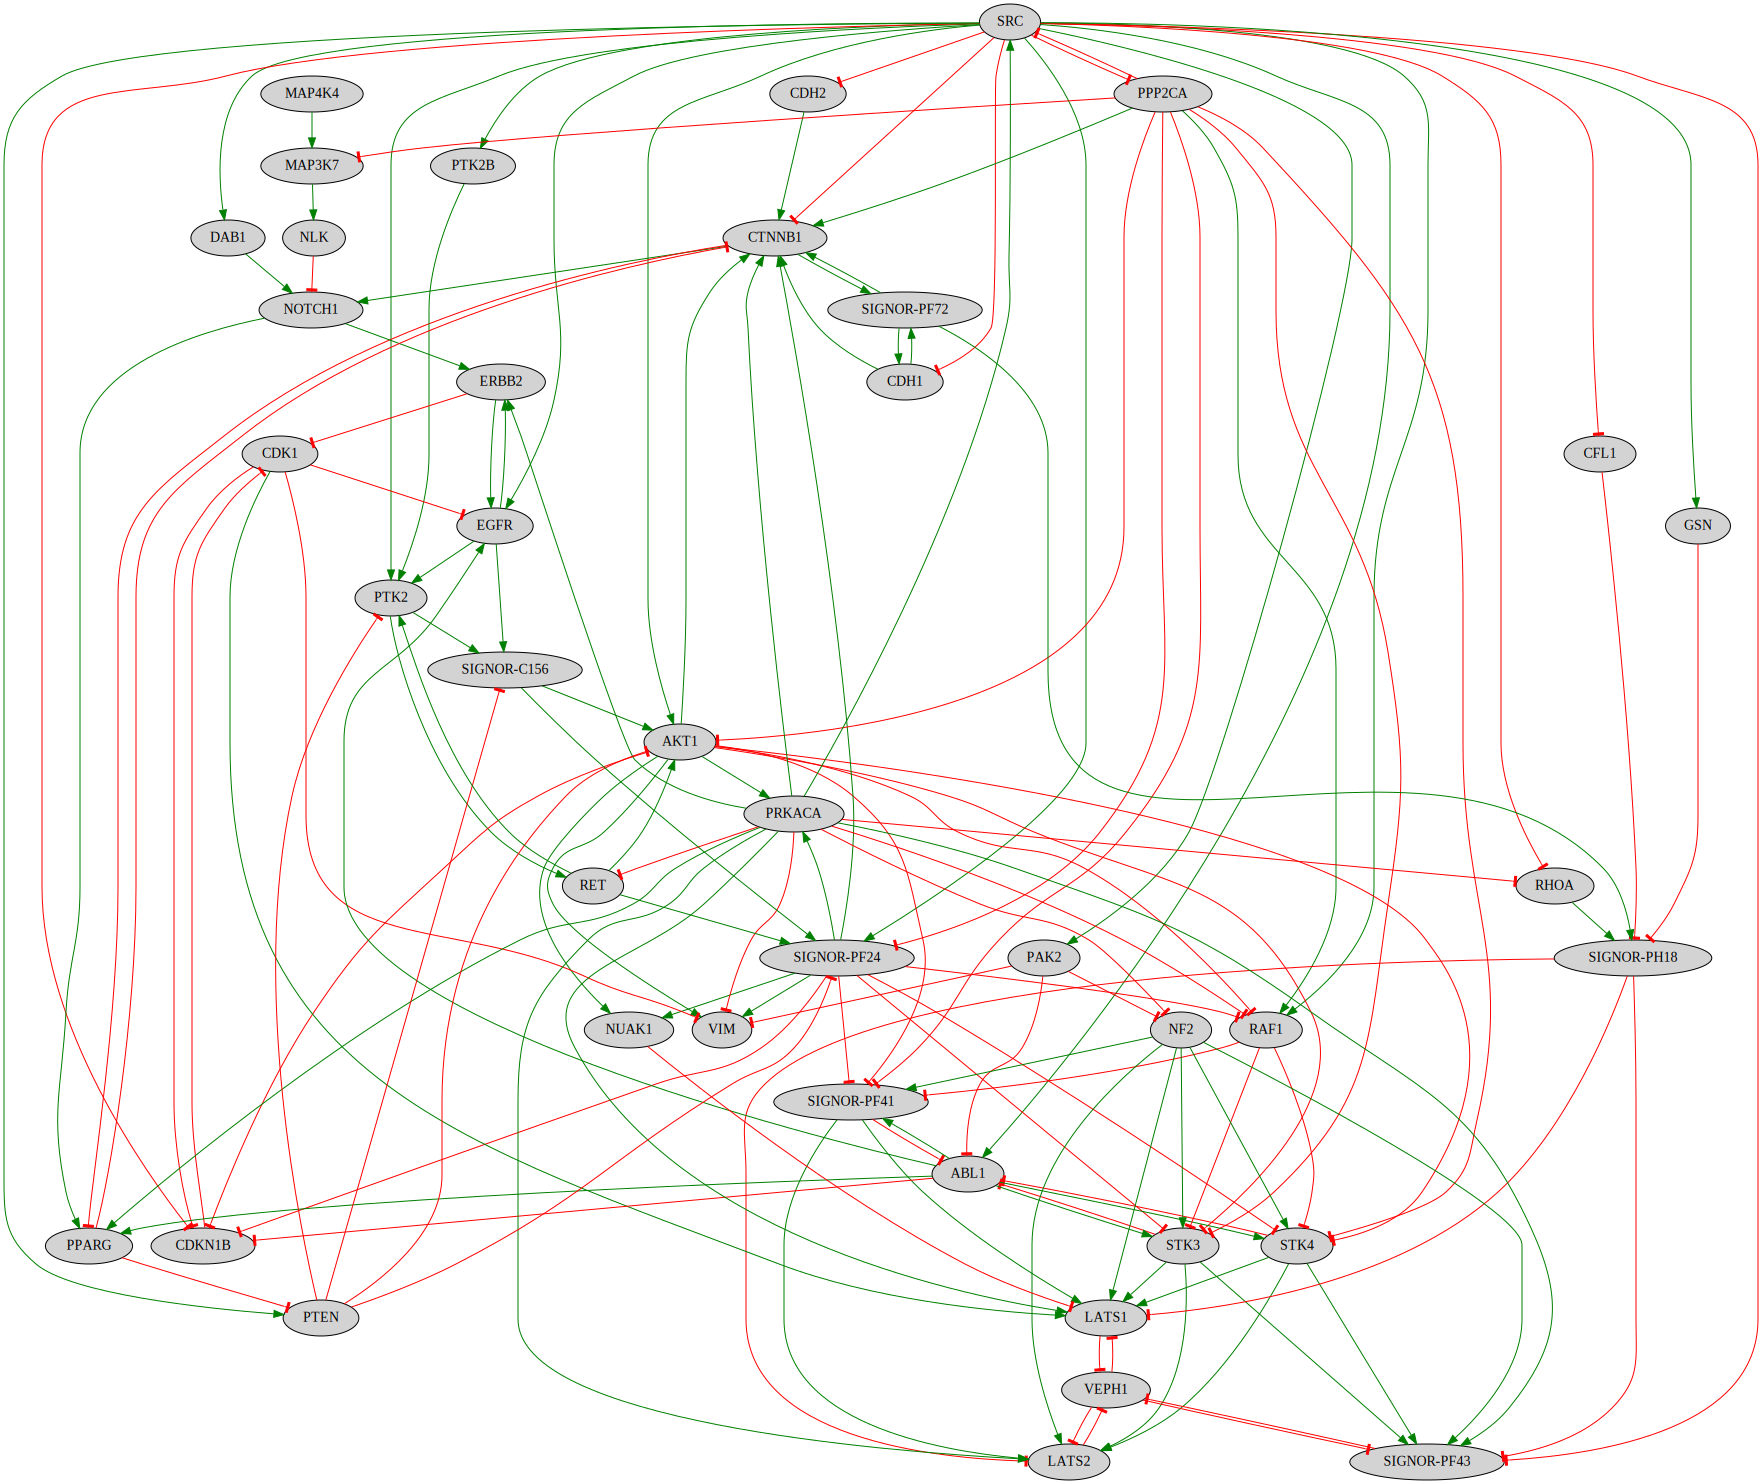

In [13]:
#Visualize network
visualizer1 = NetworkVisualizer(new_net1, color_by='effect')
visualizer1.render()

In [ ]:
from omniflow_project._outputs.exports import Exports

In [ ]:
export = Exports(new_net1)

In [ ]:
export.export_bnet()
export.export_sif()